In [180]:
import pandas as pd
import numpy  as np

import sklearn
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

import imblearn
from imblearn.over_sampling import RandomOverSampler

In [181]:
df = pd.read_csv('../data/processed/spambase.data', sep=',', decimal = '.', header=0)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

df_shuffeled = df.sample(frac=1).reset_index(drop=True)

train_end = int(0.6 * len(df_shuffeled))
valid_end = int(0.8 * len(df_shuffeled))

train = df_shuffeled.iloc[:train_end]
valid = df_shuffeled.iloc[train_end:valid_end]
test  = df_shuffeled.iloc[valid_end:]

In [183]:
print(len(df[df['spam'] == 1]))
print(len(df[df['spam'] == 0]))

1813
2788


In [184]:
from pandas import DataFrame

def scale_dataset(dataframe: DataFrame, oversample=False):
	X = dataframe[dataframe.columns[:-1]].values
	y = dataframe[dataframe.columns[-1]].values

	scaler = StandardScaler()
	X = scaler.fit_transform(X)

	if oversample:
		ros = RandomOverSampler()
		X, y = ros.fit_resample(X, y)

	data = np.hstack((X, np.reshape(y, (-1, 1))))

	return data, X, y

In [185]:
train, X_train, y_train = scale_dataset(train, True)
valid, X_valid, y_valid = scale_dataset(valid, False)
test, X_test, y_test = scale_dataset(test, False)

## k-nearest neighbours (KNN)

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [187]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_model.fit(X_train, y_train)
knn_model

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [188]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       540
           1       0.86      0.86      0.86       381

    accuracy                           0.88       921
   macro avg       0.88      0.88      0.88       921
weighted avg       0.88      0.88      0.88       921



## Naive Bayes

In [189]:
from sklearn.naive_bayes import GaussianNB

In [190]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
nb_model

,priors,None
,var_smoothing,1e-09


In [191]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       540
           1       1.00      0.00      0.01       381

    accuracy                           0.59       921
   macro avg       0.79      0.50      0.37       921
weighted avg       0.76      0.59      0.44       921



## Logistic regression

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
log_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [194]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       540
           1       0.92      0.88      0.90       381

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



## SVM

In [195]:
from sklearn.svm import SVC

In [196]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
svm_model

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [197]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       540
           1       0.93      0.86      0.90       381

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



## Neural Net

In [198]:
import tensorflow as tf

In [199]:
def plot_history(history):
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
	ax1.plot(history.history['loss'], label='loss')
	ax1.plot(history.history['val_loss'], label='val_loss')
	ax1.set_xlabel('Epoch')
	ax1.set_ylabel('Binary crossenthropy')
	ax1.grid(True)
	
	ax2.plot(history.history['accuracy'], label='accuracy')
	ax2.plot(history.history['val_accuracy'], label='val_accuracy')
	ax2.set_xlabel('Epoch')
	ax2.set_ylabel('Accuracy')
	ax2.grid(True)

	plt.show()


In [200]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
	nn_model = tf.keras.Sequential([
		tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(57,)), # 57 features train data
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(num_nodes, activation='relu'),
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(1, activation='sigmoid')
	])

	nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

	history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

	return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
least_loss_history = None

epochs = 100
dropout_prob = 0.2
for num_nodes in [32, 64]:
	for lr in [0.005, 0.001]:
		for batch_size in [64, 128]:
			print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch {batch_size}")
			model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
			val_loss = model.evaluate(X_valid, y_valid)[0]

			if val_loss < least_val_loss: 
				least_val_loss = val_loss
				least_loss_model = model
				least_loss_history = history

The Least loss model outputs: 



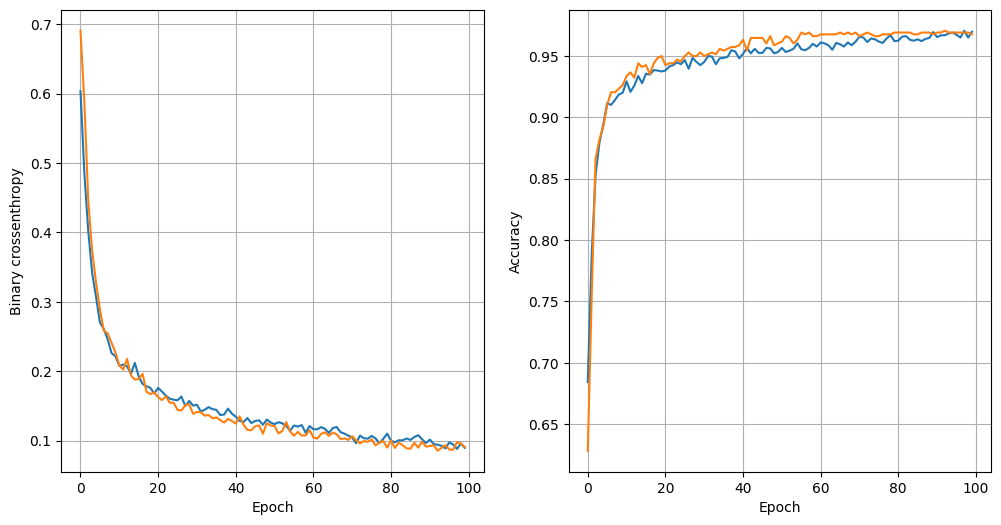

In [206]:
print(f'The Least loss model outputs: \n')
plot_history(least_loss_history)

In [202]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       540
           1       0.95      0.88      0.91       381

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921

